In [1]:
# Importando NumPy e Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Essa função lê e trata os dados do arquivo.
# Eu escolhi um dataset que peguei no Kaggle 
# para usar como exemplo nesse exercício.
def get_data() -> pd.DataFrame:
    # Lê os dados do dataset.
    df = pd.read_csv("women_clothing_ecommerce_sales.csv")
    
    # Renomeia a columa "sku" para uma forma 
    # mais entendível.
    df.rename(columns={"sku": "id"}, inplace=True)
    
    # Arruma a tipagem dos dados.
    df["order_date"] = pd.to_datetime(df["order_date"]).dt.date
    df["order_date"] = pd.to_datetime(df["order_date"])
    
    # Seta o index como o ID do pedido
    df["order_id"] = np.arange(1, len(df) + 1)
    df.set_index("order_id", inplace=True)

    return df

# Calcula a média das vendas.
def get_mean(data: pd.DataFrame) -> int:
    # Agrupamos nossos valores pela data 
    # da compra, e usamos a função sum
    # para lidar com os valores.
    df = data.groupby("order_date").sum(numeric_only=True)
    
    # Para preencher as datas que
    # não tiveram vendas, usamos essa função.
    df = df.asfreq("d")
    df.fillna(value=0, inplace=True)
    
    # Usamos a função mean para
    # calcular a média de vendas.
    order_mean = df["quantity"].mean()
    
    # Antes de retornar, arrendondamos para cima.
    return round(order_mean)

# Calcula a quantidade vendida de cada produto.
def get_total(data: pd.DataFrame) -> pd.DataFrame:
    # Agrupamos nossos valores pelo ID 
    # do produto, e usamos a função sum
    # para lidar com os valores.
    df = data.groupby("id").sum(numeric_only=True)
    
    # Como queremos só a quantidade,
    # passamos ela como parâmentro aqui.
    df = df["quantity"]
    
    return df

# Essa função cria um gráfico de pizza
# para o total de vendas de cada produto.
def plot_total(data: pd.DataFrame):
    data.plot(kind="pie", 
              y="Quantidade",
              legend=True,
              labeldistance=None)
    plt.title("Total de vendas por produto (ID)", size=24)
    plt.ylabel("")
    plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.show()

In [3]:
def main():
    # Fazemos a leitura dos dados.
    data = get_data()
    
    # Chamamos a função para pegar
    # a médias das vendas.
    order_mean = get_mean(data)
    
    # Chamamos a função para pegar
    # o total de vendas de cada produto.
    total = get_total(data)
    
    print(f"A média de vendas diárias é de aproximadamente {order_mean}!")
    print(f"Um total de {len(data)} produtos foram vendidos nesse período.")
    print()
    plot_total(total)
    

A média de vendas diárias é de aproximadamente 4!
Um total de 527 produtos foram vendidos nesse período.



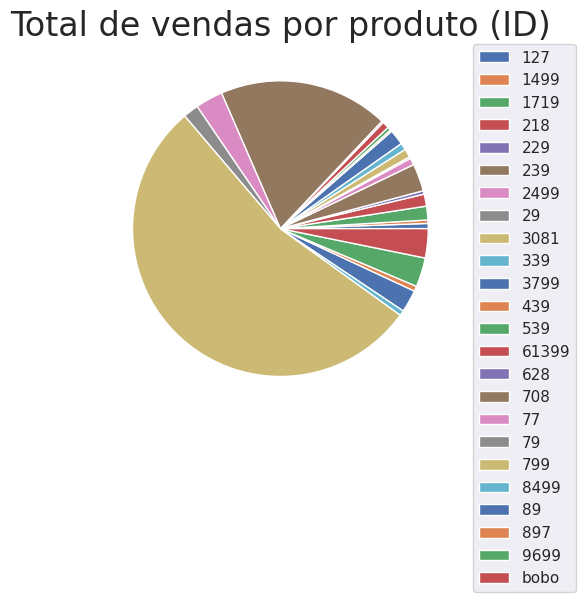

In [4]:
if __name__ == '__main__':
    main()